In [1]:
import pandas as pd

In [9]:
import os
os.chdir('/Users/mclevisachila/Downloads/')
breast_cancer_data = pd.read_csv('Final Folder/Dataset/breast_cancer.csv')

In [10]:
breast_cancer_data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
x=breast_cancer_data.iloc[:,1:-1].values
y=breast_cancer_data.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression(random_state=0)

In [17]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
cm=confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[84,  3],
       [ 3, 47]])

In [24]:
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.9562043795620438

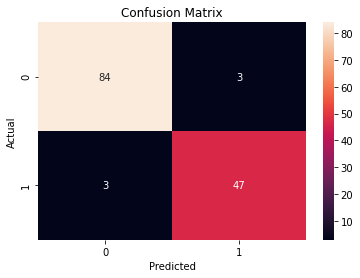

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(model, x, y, cv=5)

In [32]:
scores

array([0.94160584, 0.94160584, 0.98540146, 0.97794118, 0.98529412])

In [33]:
scores.std()

0.02039969664564386

In [38]:
scores.mean()

0.9663696865607557

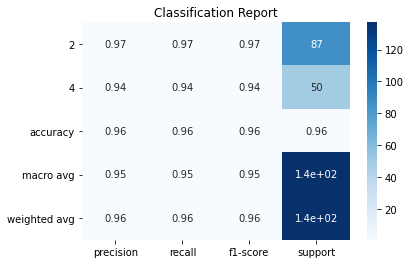

In [39]:
model = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
df = pd.DataFrame(model).transpose()

# Visualize the report
sns.heatmap(df, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()